# Unit 5 - Financial Planning


In [1]:
# Initial imports
import os
import json
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Fetch current BTC price
btc_response = requests.get(btc_url).json()
print(json.dumps(btc_response, indent=4))

{
    "data": {
        "1": {
            "id": 1,
            "name": "Bitcoin",
            "symbol": "BTC",
            "website_slug": "bitcoin",
            "rank": 1,
            "circulating_supply": 18752912,
            "total_supply": 18752912,
            "max_supply": 21000000,
            "quotes": {
                "USD": {
                    "price": 33967.0,
                    "volume_24h": 20978838431,
                    "market_cap": 639297138839,
                    "percentage_change_1h": 0.188198469534213,
                    "percentage_change_24h": 1.25741482424406,
                    "percentage_change_7d": 0.0477292643722985,
                    "percent_change_1h": 0.188198469534213,
                    "percent_change_24h": 1.25741482424406,
                    "percent_change_7d": 0.0477292643722985
                },
                "CAD": {
                    "price": 42282.1216,
                    "volume_24h": 26114458078.9088,
                   

In [6]:
# Fetch current ETH price
eth_response = requests.get(eth_url).json()
print(json.dumps(eth_response, indent=4))

{
    "data": {
        "1027": {
            "id": 1027,
            "name": "Ethereum",
            "symbol": "ETH",
            "website_slug": "ethereum",
            "rank": 2,
            "circulating_supply": 116638365,
            "total_supply": 116638365,
            "max_supply": 0,
            "quotes": {
                "USD": {
                    "price": 2129.51,
                    "volume_24h": 18231865483,
                    "market_cap": 249653117596,
                    "percentage_change_1h": 0.242151951166142,
                    "percentage_change_24h": -1.58252475200248,
                    "percentage_change_7d": -1.31497343359179,
                    "percent_change_1h": 0.242151951166142,
                    "percent_change_24h": -1.58252475200248,
                    "percent_change_7d": -1.31497343359179
                },
                "CAD": {
                    "price": 2650.814048,
                    "volume_24h": 22695026153.2384,
               

In [7]:
# Compute current value of my crpto
my_btc_price = btc_response['data']['1']['quotes']['USD']['price']
my_eth_price = eth_response['data']['1027']['quotes']['USD']['price']
my_btc_value = my_btc_price*my_btc
my_eth_value = my_eth_price*my_eth

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $40760.40
The current value of your 5.3 ETH is $11286.40


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [8]:
# Current amount of shares
my_agg = 200
my_spy = 50

In [9]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

In [10]:
# Create the Alpaca API object
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

In [11]:
# Format current date as ISO format
today = pd.Timestamp("2021-03-12", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
current_prices = api.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today
).df

# Preview DataFrame
current_prices

AGG                                       SPY  \
                             open    high      low   close   volume    open   
time                                                                          
2021-03-12 00:00:00-05:00  113.88  113.91  113.705  113.79  4339393  392.07   

                                                            
                             high    low   close    volume  
time                                                        
2021-03-12 00:00:00-05:00  394.21  391.2  394.09  56997361

In [12]:
# Pick AGG and SPY close prices
agg_close_price = float(current_prices["AGG"]["close"])
spy_close_price = float(current_prices["SPY"]["close"])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $113.79
Current SPY closing price: $394.09


In [13]:
# Compute the current value of shares
my_spy_value = spy_close_price*my_spy
my_agg_value = agg_close_price*my_agg

# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $19704.50
The current value of your 200 AGG shares is $22758.00


### Savings Health Analysis

In [14]:
# Set monthly household income
monthly_income = 12000

# Create savings DataFrame
savings_data = {
    "amount": [my_btc_value + my_eth_value, my_spy_value + my_agg_value]
}
index = ['crypto','shares']
df_savings = pd.DataFrame(savings_data,index)

# Display savings DataFrame
display(df_savings)

,amount
crypto,52046.803
shares,42462.500


<AxesSubplot:title={'center':'Composition of Personal Savings'}, ylabel='amount'>

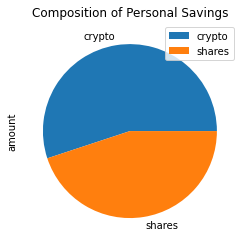

In [15]:
# Plot savings pie chart
df_savings.plot.pie(y="amount", title="Composition of Personal Savings")

In [16]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = df_savings['amount'].sum()

# Validate saving health
if total_savings > emergency_fund:
    print('Congradulations! There is enough savings in your emergency fund.')
if total_savings == emergency_fund:
    print('Congradulations! You have just enough savings for your emergency fund.')
if total_savings < emergency_fund:
    print(f'You are ${(emergency_fund - total_savings)}) from having an ideal amount of money for an emergency fund')

Congradulations! There is enough savings in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [17]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2015-08-07', tz='America/New_York').isoformat()
end_date1 = pd.Timestamp('2020-08-07', tz='America/New_York').isoformat()
end_date2 = pd.Timestamp('2020-08-07', tz='America/New_York').isoformat()

In [22]:
# Get 5 years' worth of historical data for SPY and AGG
df_stock_data1 = api.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date1,
    limit=756
).df

df_stock_data2 = api.get_barset(
    tickers,
    timeframe,
    start=end_date1,
    end=end_date2,
    limit=756
).df
df_stock_data = pd.concat([df_stock_data1,df_stock_data2])
# Display sample data
df_stock_data.head()

AGG                                       \
                             open      high     low     close   volume   
time                                                                     
2017-08-08 00:00:00-04:00  109.67  109.6900  109.50  109.5810  1998999   
2017-08-09 00:00:00-04:00  109.87  109.8700  109.66  109.6700  2069028   
2017-08-10 00:00:00-04:00  109.70  109.8500  109.67  109.8053  1691677   
2017-08-11 00:00:00-04:00  109.75  109.9400  109.68  109.8850  1613467   
2017-08-14 00:00:00-04:00  109.84  109.8969  109.74  109.8100  2002026   

                              SPY                                     
                             open    high     low    close    volume  
time                                                                  
2017-08-08 00:00:00-04:00  247.51  248.91  246.83  247.291  44619069  
2017-08-09 00:00:00-04:00  246.47  247.31  246.06  247.230  48543032  
2017-08-10 00:00:00-04:00  246.28  246.44  243.70  243.790  87857827  
2017-08-11 00:00:00-04:00  244.02  244.80  243.75  244.110  56404847  
2017-08-14 00:00:00-04:00  245.59  246.79  245.55  246.520  49018104

In [23]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_dist = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [24]:
# Printing the simulation input data
MC_dist.portfolio_data.head()

AGG                                       \
                             open      high     low     close   volume   
time                                                                     
2017-08-08 00:00:00-04:00  109.67  109.6900  109.50  109.5810  1998999   
2017-08-09 00:00:00-04:00  109.87  109.8700  109.66  109.6700  2069028   
2017-08-10 00:00:00-04:00  109.70  109.8500  109.67  109.8053  1691677   
2017-08-11 00:00:00-04:00  109.75  109.9400  109.68  109.8850  1613467   
2017-08-14 00:00:00-04:00  109.84  109.8969  109.74  109.8100  2002026   

                                           SPY                           \
                          daily_return    open    high     low    close   
time                                                                      
2017-08-08 00:00:00-04:00          NaN  247.51  248.91  246.83  247.291   
2017-08-09 00:00:00-04:00     0.000812  246.47  247.31  246.06  247.230   
2017-08-10 00:00:00-04:00     0.001234  246.28  246.44  243.70  243.790   
2017-08-11 00:00:00-04:00     0.000726  244.02  244.80  243.75  244.110   
2017-08-14 00:00:00-04:00    -0.000683  245.59  246.79  245.55  246.520   

                                                  
                             volume daily_return  
time                                              
2017-08-08 00:00:00-04:00  44619069          NaN  
2017-08-09 00:00:00-04:00  48543032    -0.000247  
2017-08-10 00:00:00-04:00  87857827    -0.013914  
2017-08-11 00:00:00-04:00  56404847     0.001313  
2017-08-14 00:00:00-04:00  49018104     0.009873

In [26]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.998645,0.999679,0.994627,1.010091,1.008113,1.006881,1.009466,0.984351,1.009456,1.003595,...,1.014594,0.986723,0.991522,1.001563,0.990708,1.005305,0.999868,1.011492,0.987728,1.011502
2,0.992649,1.003734,1.009739,1.012408,1.001135,1.013554,1.013735,0.976979,0.999278,1.006017,...,1.005989,0.982889,1.002827,0.997104,0.981968,1.000859,1.005555,0.999849,0.998510,1.018505
3,0.997583,1.002793,1.013052,0.994576,0.993856,1.005173,1.027500,0.964658,0.998204,0.982591,...,1.003345,0.980921,1.009530,1.014688,0.981127,0.996783,0.996218,0.989556,1.005803,1.026359
4,0.997222,0.998179,1.010307,0.994097,0.986370,1.004791,1.034536,0.980077,1.007567,0.995398,...,0.995066,0.991969,1.006657,1.017426,0.976077,1.011964,0.983741,1.000553,1.007104,1.027909
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,21.736148,45.366351,9.781541,9.423497,19.002472,32.703406,21.050502,3.387963,3.493161,2.877054,...,13.936017,20.013583,3.853745,7.072704,21.316052,28.901234,15.230884,9.981475,11.669074,17.056233
7557,22.429963,44.955368,9.837203,9.551195,18.785459,32.906635,20.871150,3.399838,3.479845,2.909839,...,13.912471,20.044794,3.839677,7.131198,21.199398,29.090973,15.323900,10.138316,11.586203,17.277394
7558,22.211494,44.943254,9.905199,9.559174,18.885977,32.647646,21.013469,3.372364,3.438954,2.891311,...,14.069465,20.093731,3.914807,7.151495,21.037453,28.930471,15.265791,10.135184,11.408382,17.201053
7559,22.173296,45.514164,9.944898,9.506272,18.884418,32.764909,21.101169,3.317125,3.452414,2.881380,...,14.119491,20.077015,3.938837,6.992784,20.788699,28.953419,15.321198,10.214506,11.240207,17.219118


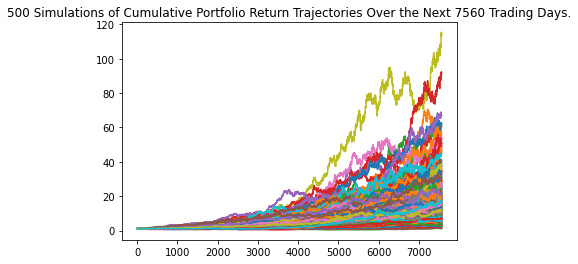

In [27]:
# Plot simulation outcomes
line_plot = MC_dist.plot_simulation()

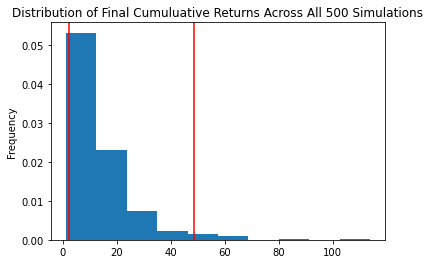

In [28]:
# Plot probability distribution and confidence intervals
dist_plot = MC_dist.plot_distribution()

### Retirement Analysis

In [29]:
# Fetch summary statistics from the Monte Carlo simulation results
MC_tbl = MC_dist.summarize_cumulative_return()

# Print summary statistics
print(MC_tbl)

count           500.000000
mean             13.956986
std              12.401862
min               1.194983
25%               6.145504
50%              10.264651
75%              17.661987
max             113.858383
95% CI Lower      2.524025
95% CI Upper     48.831691
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [31]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(MC_tbl[8]*initial_investment,2)
ci_upper = round(MC_tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $50480.5 and $976633.83


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [32]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(MC_tbl[8]*initial_investment,2)
ci_upper = round(MC_tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $75720.74 and $1464950.74


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [35]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_retire_dist = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [36]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_retire_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.000118,1.005731,0.997991,1.003378,0.999084,0.991212,0.975047,1.004315,0.997369,1.003310,...,0.992695,0.998163,1.008387,1.017306,1.013463,1.006090,0.998021,0.996629,1.004850,1.004760
2,1.009006,1.009798,1.003726,1.014243,1.002427,0.983085,0.968134,1.011738,1.001551,1.002980,...,0.991789,1.010243,1.000544,1.024567,1.014647,1.006439,1.012088,0.996367,0.992937,1.013693
3,1.016141,0.996347,1.014218,1.013791,0.992580,0.992157,0.967897,0.996725,0.999980,1.009631,...,0.983974,1.017739,0.994572,1.024021,1.007535,1.002981,1.018236,1.002716,1.007235,1.018011
4,1.026494,1.001670,1.010124,1.010318,0.998673,0.996431,0.975805,0.995949,1.000780,0.998256,...,0.992324,1.014163,0.996457,1.035487,1.010668,0.997495,1.009242,1.017402,1.012476,1.005789
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,0.806631,1.366762,1.200004,1.369076,1.101877,1.872267,1.083223,4.907974,2.773501,1.727095,...,2.096523,1.871116,1.024555,0.776314,0.599075,0.960092,1.730819,1.362803,1.949194,1.604325
1257,0.809221,1.371367,1.187517,1.371225,1.095125,1.860731,1.089750,4.893830,2.769916,1.721630,...,2.088405,1.858119,1.033294,0.776423,0.590008,0.961972,1.697676,1.354018,1.947558,1.613708
1258,0.809156,1.381744,1.179364,1.379170,1.109682,1.868014,1.094881,4.953207,2.754366,1.743918,...,2.117096,1.843835,1.028742,0.781314,0.590891,0.966872,1.687724,1.344447,1.940374,1.618963
1259,0.808540,1.371519,1.185617,1.366183,1.131549,1.877552,1.076986,4.890696,2.743898,1.753861,...,2.110896,1.820690,1.025427,0.778587,0.598146,0.967124,1.670440,1.354535,1.931495,1.607671


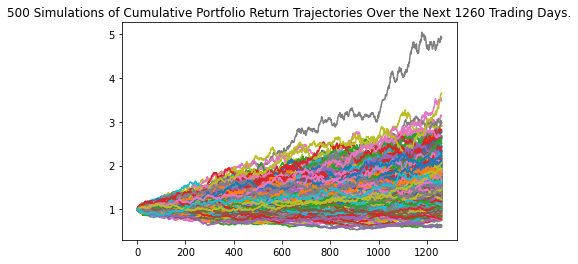

In [37]:
# Plot simulation outcomes
retire_line_plot = MC_retire_dist.plot_simulation()

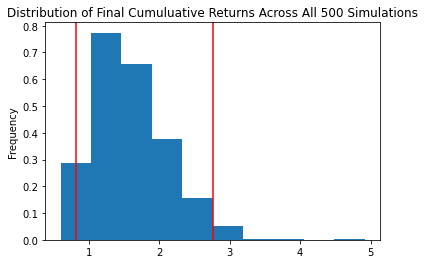

In [38]:
# Plot probability distribution and confidence intervals
retire_dist_plot = MC_retire_dist.plot_distribution()

In [39]:
# Fetch summary statistics from the Monte Carlo simulation results
MC_retire_tbl = MC_retire_dist.summarize_cumulative_return()

# Print summary statistics
print(MC_retire_tbl)

count           500.000000
mean              1.601213
std               0.529646
min               0.602085
25%               1.222725
50%               1.529424
75%               1.912670
max               4.918867
95% CI Lower      0.820680
95% CI Upper      2.771109
Name: 1260, dtype: float64


In [41]:
# Set initial investment
retire_initial_investment = 100000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(MC_tbl[8]*initial_investment,2)
ci_upper_five = round(MC_tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 5 years will end within in the range of $75720.74 and $1464950.74


### Ten Years Retirement Option

In [42]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_retire10_dist = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*5
)   

In [43]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_retire10_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.008007,1.008611,0.989491,1.007834,1.001985,0.995819,1.008175,1.006682,1.002817,0.981706,...,1.004156,0.993767,1.001932,0.995663,0.988773,0.998541,1.004519,0.988640,0.997932,0.991965
2,1.015776,1.006602,0.971284,0.997254,0.996788,1.000316,1.019595,1.011715,1.004694,0.973459,...,0.998687,0.997806,1.004407,0.998947,0.984965,0.989783,0.995945,0.974127,0.998280,0.998098
3,1.016098,1.005518,0.971073,0.992279,0.986685,0.990429,1.007596,1.022115,0.998361,0.966019,...,0.996015,0.990844,1.020779,0.988132,0.981282,0.992526,0.996555,0.977165,0.991416,1.006377
4,1.025857,1.026511,0.976727,0.993903,1.002943,1.003898,1.002223,1.040105,0.989843,0.961178,...,0.993872,1.009304,1.017541,0.993607,0.985386,0.990691,0.997646,0.971866,0.991660,1.023482
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,0.898619,1.670445,1.684974,1.512855,1.279308,1.263918,1.215526,1.768316,2.588420,1.102058,...,1.387112,1.792544,1.802116,2.240383,1.386749,0.788071,1.011312,2.017453,2.549355,2.202504
1257,0.907234,1.694537,1.672564,1.493714,1.304183,1.258579,1.216927,1.790028,2.594590,1.091645,...,1.406269,1.743276,1.815182,2.220024,1.363675,0.789514,1.011992,2.046265,2.538814,2.164495
1258,0.911951,1.665059,1.706096,1.491491,1.293175,1.251935,1.219827,1.760225,2.605966,1.079452,...,1.400268,1.738851,1.840433,2.195497,1.347297,0.790684,1.011142,2.032343,2.540983,2.207747
1259,0.908856,1.681983,1.709986,1.481786,1.299706,1.259134,1.217898,1.774603,2.593565,1.090395,...,1.395934,1.730281,1.855438,2.158440,1.358519,0.790030,1.012291,2.046388,2.503904,2.215547


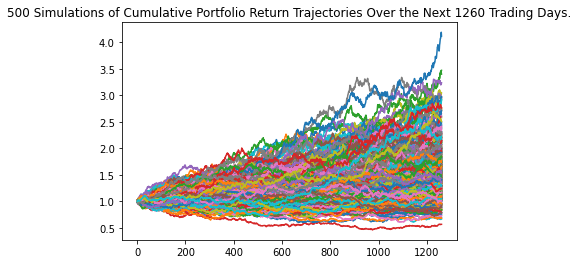

In [44]:
# Plot simulation outcomes
retire10_line_plot = MC_retire10_dist.plot_simulation()

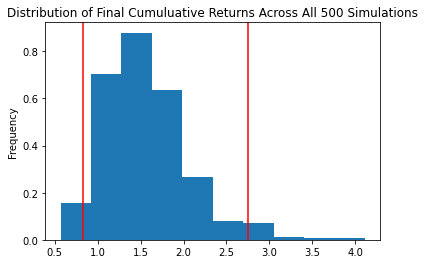

In [45]:
# Plot probability distribution and confidence intervals
retire10_dist_plot = MC_retire10_dist.plot_distribution()

In [46]:
# Fetch summary statistics from the Monte Carlo simulation results
MC_retire10_tbl = MC_retire10_dist.summarize_cumulative_return()

# Print summary statistics
print(MC_retire10_tbl)

count           500.000000
mean              1.550754
std               0.489077
min               0.566116
25%               1.202046
50%               1.491958
75%               1.796193
max               4.114230
95% CI Lower      0.825942
95% CI Upper      2.747035
Name: 1260, dtype: float64


In [47]:
# Set initial investment
retire_initial_investment = 100000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(MC_tbl[8]*initial_investment,2)
ci_upper_ten = round(MC_tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 10 years will end within in the range of $75720.74 and $1464950.74
